In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib

ImportError: /home/olympia/mambaforge-pypy3/envs/cellXplore/lib/python3.8/site-packages/sklearn/utils/../../../../libgomp.so.1: cannot allocate memory in static TLS block

In [6]:
import inspect

In [7]:
inspect.getfile(sq)


'/home/2505621h/Desktop/Test/cellxgene_VIP/squidpy/__init__.py'

In [90]:
adata = sc.read_h5ad("/home/2505621h/Desktop/covid.h5ad")

In [9]:
adata.obs['Cell_Type'] = adata.obs['Cell_Type'].astype('category')

In [10]:
cci = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key='Cell_Type',
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
    interactions_params={'resources': 'CellPhoneDB'}
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

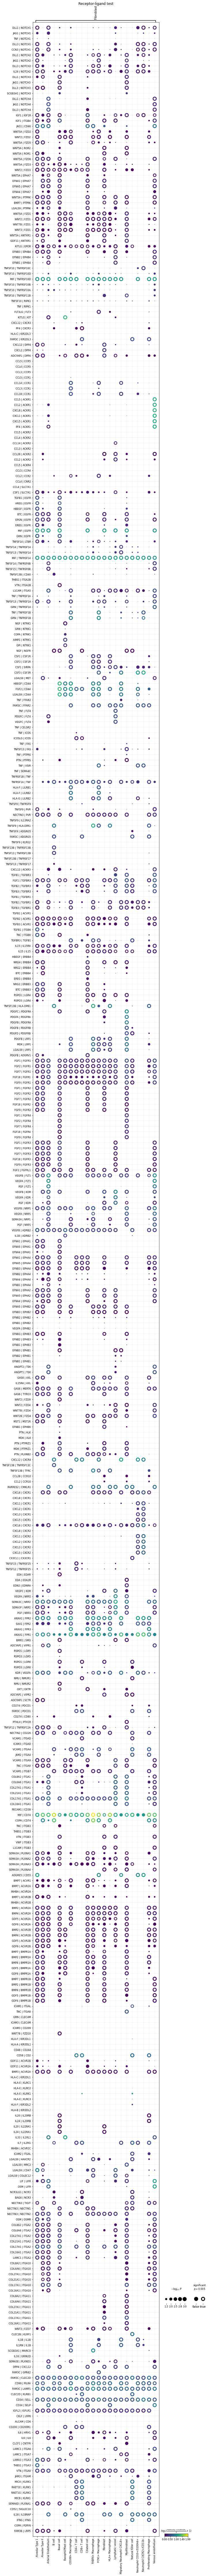

In [14]:
plot = sq.pl.ligrec(cci, source_groups='Fibroblast', alpha=0.005, return_fig = True)

In [7]:
type(cci)

dict

In [8]:
cci["pvalues"].head()

cluster_1     Alveolar Type 1                                               \
cluster_2     Alveolar Type 1 Alveolar Type II Arterial Endothelium B cell   
source target                                                                
JAG2   NOTCH1             0.0            0.654                  0.0  0.977   
DLL1   NOTCH1             NaN              NaN                  NaN    NaN   
JAG1   NOTCH1             0.0            0.910                  0.0  0.999   
TNF    NOTCH1             NaN              NaN                  NaN    NaN   
DLL4   NOTCH1             NaN              NaN                  NaN    NaN   

cluster_1                                                                  \
cluster_2     Basal cell Basophil/Mast cell CD168+ Macrophage CD4+ T cell   
source target                                                               
JAG2   NOTCH1      0.079                NaN             0.028       0.982   
DLL1   NOTCH1        NaN                NaN               NaN         NaN   
JAG1   NOTCH1      0.290                NaN             0.222       0.999   
TNF    NOTCH1        NaN                NaN               NaN         NaN   
DLL4   NOTCH1        NaN                NaN               NaN         NaN   

cluster_1                                ... Venous endothelium  \
cluster_2     CD8+ T cell Ciliated cell  ...         Fibroblast   
source target                            ...                      
JAG2   NOTCH1       0.989         0.922  ...              0.998   
DLL1   NOTCH1         NaN           NaN  ...              0.170   
JAG1   NOTCH1       1.000         0.997  ...              0.001   
TNF    NOTCH1         NaN           NaN  ...              1.000   
DLL4   NOTCH1         NaN           NaN  ...              0.989   

cluster_1                                                                   \
cluster_2     HLA+ Macrophage Lymphatic vessel Migratory Neutrophil CXCL8+   
source target                                                                
JAG2   NOTCH1           0.973            0.020                       0.856   
DLL1   NOTCH1           0.000            0.000                       0.000   
JAG1   NOTCH1           0.000            0.000                       0.000   
TNF    NOTCH1           1.000            0.789                       1.000   
DLL4   NOTCH1           0.739            0.004                       0.464   

cluster_1                                                                 \
cluster_2     Myofibroblast Natural Killer cell Neutrophil CD10+/S100A4+   
source target                                                              
JAG2   NOTCH1         1.000               0.982                    0.002   
DLL1   NOTCH1         0.027               0.000                    0.000   
JAG1   NOTCH1         0.000               0.000                    0.000   
TNF    NOTCH1         1.000               1.000                    1.000   
DLL4   NOTCH1         0.989               0.857                    0.000   

cluster_1                                                        \
cluster_2     Neutrophil CXCR2+/CD11b- Proliferating Macrophage   
source target                                                     
JAG2   NOTCH1                    0.000                    0.410   
DLL1   NOTCH1                    0.000                    0.001   
JAG1   NOTCH1                    0.000                    0.000   
TNF    NOTCH1                    0.995                    0.999   
DLL4   NOTCH1                    0.000                    0.236   

cluster_1                         
cluster_2     Venous endothelium  
source target                     
JAG2   NOTCH1              0.000  
DLL1   NOTCH1              0.000  
JAG1   NOTCH1              0.000  
TNF    NOTCH1              0.923  
DLL4   NOTCH1              0.000  

[5 rows x 484 columns]

In [22]:
cci_columns = list(cci["pvalues"].columns)
cci_plong = pd.melt(cci["pvalues"], value_vars = cci_columns, value_name = 'P-value', ignore_index = False)
cci_plong = cci_plong.reset_index(level=['source', 'target'])
test1 = cci_plong.head()
test1

source  target        cluster_1        cluster_2  P-value
0   JAG2  NOTCH1  Alveolar Type 1  Alveolar Type 1      0.0
1   DLL1  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN
2   JAG1  NOTCH1  Alveolar Type 1  Alveolar Type 1      0.0
3    TNF  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN
4   DLL4  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN

In [23]:
cci_columns = list(cci["means"].columns)
cci_means_long = pd.melt(cci["means"], value_vars = cci_columns, value_name = 'Mean Expression', ignore_index = False)
cci_means_long = cci_means_long.reset_index(level=['source', 'target'])
test2 = cci_means_long.head()

In [57]:
merged = pd.merge(test1, test2, how = "outer")
merged.head()

source  target        cluster_1        cluster_2  P-value  Mean Expression
0   JAG2  NOTCH1  Alveolar Type 1  Alveolar Type 1      0.0         0.146787
1   DLL1  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN         0.120592
2   JAG1  NOTCH1  Alveolar Type 1  Alveolar Type 1      0.0         0.166495
3    TNF  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN         0.125881
4   DLL4  NOTCH1  Alveolar Type 1  Alveolar Type 1      NaN         0.121069

In [ ]:
merged = merged_cci.reset_index(level=['source', 'target'])
 

In [10]:
cci_columns = list(cci["metadata"].columns)
cci_plong = pd.melt(cci["metadata"], value_vars = cci_columns, value_name = 'P-value', ignore_index = False)
cci_plong.head()

aspect_intercell_source aspect_intercell_target  \
source target                                                   
JAG2   NOTCH1              functional              functional   
DLL1   NOTCH1              functional              functional   
JAG1   NOTCH1              functional              functional   
TNF    NOTCH1              functional              functional   
DLL4   NOTCH1              functional              functional   

              category_intercell_source category_intercell_target  \
source target                                                       
JAG2   NOTCH1                    ligand                  receptor   
DLL1   NOTCH1                    ligand                  receptor   
JAG1   NOTCH1                    ligand                  receptor   
TNF    NOTCH1                    ligand                  receptor   
DLL4   NOTCH1                    ligand                  receptor   

              category_source_intercell_source  \
source target                                    
JAG2   NOTCH1                resource_specific   
DLL1   NOTCH1                resource_specific   
JAG1   NOTCH1                resource_specific   
TNF    NOTCH1                resource_specific   
DLL4   NOTCH1                resource_specific   

              category_source_intercell_target  consensus_direction  \
source target                                                         
JAG2   NOTCH1                resource_specific                 True   
DLL1   NOTCH1                resource_specific                 True   
JAG1   NOTCH1                resource_specific                 True   
TNF    NOTCH1                resource_specific                False   
DLL4   NOTCH1                resource_specific                 True   

               consensus_inhibition  consensus_score_intercell_source  \
source target                                                           
JAG2   NOTCH1                 False                                11   
DLL1   NOTCH1                 False                                10   
JAG1   NOTCH1                 False                                12   
TNF    NOTCH1                 False                                19   
DLL4   NOTCH1                 False                                 9   

               consensus_score_intercell_target  ...  scope_intercell_source  \
source target                                    ...                           
JAG2   NOTCH1                                21  ...                 generic   
DLL1   NOTCH1                                21  ...                 generic   
JAG1   NOTCH1                                21  ...                 generic   
TNF    NOTCH1                                21  ...                 generic   
DLL4   NOTCH1                                21  ...                 generic   

               scope_intercell_target secreted_intercell_source  \
source target                                                     
JAG2   NOTCH1                 generic                     False   
DLL1   NOTCH1                 generic                     False   
JAG1   NOTCH1                 generic                     False   
TNF    NOTCH1                 generic                      True   
DLL4   NOTCH1                 generic                     False   

              secreted_intercell_target  \
source target                             
JAG2   NOTCH1                     False   
DLL1   NOTCH1                     False   
JAG1   NOTCH1                     False   
TNF    NOTCH1                     False   
DLL4   NOTCH1                     False   

                                                         sources  \
source target                                                      
JAG2   NOTCH1  Baccin2019;CellCall;CellChatDB;CellPhoneDB;Cel...   
DLL1   NOTCH1  Baccin2019;CellCall;CellChatDB;CellPhoneDB;Cel...   
JAG1   NOTCH1  ACSN;Baccin2019;BioGRID;CellCall;CellChatDB;Ce...   
TNF    NOTCH1             CellPhoneDB;Ce

In [15]:
cci

{'means': cluster_1     Alveolar Type 1                                                  \
 cluster_2     Alveolar Type 1 Alveolar Type II Arterial Endothelium    B cell   
 source target                                                                   
 JAG2   NOTCH1        0.146787         0.060448             0.157412  0.038084   
 DLL1   NOTCH1        0.120592         0.034254             0.131218  0.011889   
 JAG1   NOTCH1        0.166495         0.080157             0.177120  0.057792   
 TNF    NOTCH1        0.125881         0.039543             0.136507  0.017179   
 DLL4   NOTCH1        0.121069         0.034730             0.131694  0.012366   
 ...                       ...              ...                  ...       ...   
 TSLP   CRLF2         0.000000         0.000000             0.000000  0.000000   
 IFNG   IFNG          0.052940         0.045902             0.042566  0.052539   
 COPA   P2RY6         0.172754         0.188674             0.172764  0.174693   
 VSTM1 

In [28]:
cci["means"].index.values

array([('JAG2', 'NOTCH1'), ('DLL1', 'NOTCH1'), ('JAG1', 'NOTCH1'),
       ('TNF', 'NOTCH1'), ('DLL4', 'NOTCH1'), ('DLL3', 'NOTCH1'),
       ('CCN3', 'NOTCH1'), ('WNT4', 'NOTCH1'), ('DLK1', 'NOTCH1'),
       ('JAG2', 'NOTCH2'), ('DLL1', 'NOTCH2'), ('JAG1', 'NOTCH2'),
       ('DLL4', 'NOTCH2'), ('DLL3', 'NOTCH2'), ('DLK1', 'NOTCH2'),
       ('IL24', 'NOTCH2'), ('JAG2', 'NOTCH3'), ('DLL1', 'NOTCH3'),
       ('JAG1', 'NOTCH3'), ('DLL4', 'NOTCH3'), ('DLL3', 'NOTCH3'),
       ('DLK1', 'NOTCH3'), ('SCGB3A1', 'NOTCH3'), ('JAG2', 'NOTCH4'),
       ('DLL1', 'NOTCH4'), ('JAG1', 'NOTCH4'), ('DLL4', 'NOTCH4'),
       ('DLL3', 'NOTCH4'), ('DLK1', 'NOTCH4'), ('IGF1', 'IGF1R'),
       ('IGF2', 'IGF1R'), ('IGF1', 'ITGB4'), ('JAG1', 'CD46'),
       ('WNT5A', 'FZD2'), ('WNT3A', 'FZD2'), ('WNT2', 'FZD2'),
       ('WNT5A', 'FZD5'), ('WNT7A', 'FZD5'), ('WNT5A', 'ROR2'),
       ('WNT1', 'ROR2'), ('WNT5A', 'ROR1'), ('WNT5A', 'FZD6'),
       ('WNT4', 'FZD6'), ('WNT5A', 'FZD3'), ('WNT2', 'FZD3'),
       ('WNT1'

In [58]:
merged = merged.to_csv(index=False)
restable2 = merged.to_html()
restable2

AttributeError: 'str' object has no attribute 'to_html'

In [41]:
restable = merged.to_html()

In [42]:
restable

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>source</th>\n      <th>target</th>\n      <th>cluster_1</th>\n      <th>cluster_2</th>\n      <th>P-value</th>\n      <th>Mean Expression</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>JAG2</td>\n      <td>NOTCH1</td>\n      <td>Alveolar Type 1</td>\n      <td>Alveolar Type 1</td>\n      <td>0.0</td>\n      <td>0.146787</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>DLL1</td>\n      <td>NOTCH1</td>\n      <td>Alveolar Type 1</td>\n      <td>Alveolar Type 1</td>\n      <td>NaN</td>\n      <td>0.120592</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>JAG1</td>\n      <td>NOTCH1</td>\n      <td>Alveolar Type 1</td>\n      <td>Alveolar Type 1</td>\n      <td>0.0</td>\n      <td>0.166495</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>TNF</td>\n      <td>NOTCH1</td>\n      <td>Alveolar Type 1</td>\n      <td>Alveolar Type 1</td

In [43]:
json.dumps(restable)

'"<table border=\\"1\\" class=\\"dataframe\\">\\n  <thead>\\n    <tr style=\\"text-align: right;\\">\\n      <th></th>\\n      <th>source</th>\\n      <th>target</th>\\n      <th>cluster_1</th>\\n      <th>cluster_2</th>\\n      <th>P-value</th>\\n      <th>Mean Expression</th>\\n    </tr>\\n  </thead>\\n  <tbody>\\n    <tr>\\n      <th>0</th>\\n      <td>JAG2</td>\\n      <td>NOTCH1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>0.0</td>\\n      <td>0.146787</td>\\n    </tr>\\n    <tr>\\n      <th>1</th>\\n      <td>DLL1</td>\\n      <td>NOTCH1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>NaN</td>\\n      <td>0.120592</td>\\n    </tr>\\n    <tr>\\n      <th>2</th>\\n      <td>JAG1</td>\\n      <td>NOTCH1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>Alveolar Type 1</td>\\n      <td>0.0</td>\\n      <td>0.166495</td>\\n    </tr>\\n    <tr>\\n      <th>3</th>\\n      <td>TNF</td>\\n      <td>NOTCH1</td>\\n    

In [34]:
merged = pd.concat([cci["means"], cci["pvalues"]], axis=1)

In [35]:
merged.to_csv("cci.csv", index = False)

In [12]:
import csv
import json

In [38]:
merged = merged.to_csv(index=False)

In [39]:
merged

'source,target,cluster_1,cluster_2,P-value,Mean Expression\nJAG2,NOTCH1,Alveolar Type 1,Alveolar Type 1,0.0,0.14678659693633478\nDLL1,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.1205922726431584\nJAG1,NOTCH1,Alveolar Type 1,Alveolar Type 1,0.0,0.1664948395083951\nTNF,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.12588138225851306\nDLL4,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.12106850466374817\n'

In [30]:
res = json.dumps(merged)

In [31]:
res

'"source,target,cluster_1,cluster_2,P-value,Mean Expression\\nJAG2,NOTCH1,Alveolar Type 1,Alveolar Type 1,0.0,0.14678659693633478\\nDLL1,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.1205922726431584\\nJAG1,NOTCH1,Alveolar Type 1,Alveolar Type 1,0.0,0.1664948395083951\\nTNF,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.12588138225851306\\nDLL4,NOTCH1,Alveolar Type 1,Alveolar Type 1,,0.12106850466374817\\n"'

In [32]:
text_file = open("res.txt", "w")
n = text_file.write(res)
text_file.close()

In [18]:
resTable = JSON.stringify(resTable)
resTable

NameError: name 'JSON' is not defined

In [ ]:
resTable = resTable.split("\\n")
resTable 

In [ ]:
resTable = resTable.join('\n')
resTable 

In [ ]:
resTable = resTable.replace(/\\/g, '')
resTable

In [ ]:
resTable = resTable.replace(/"/g,"")
resTable

In [55]:
import diffxpy.api as de

In [92]:

  #subset by cluster
  Cluster_Key = 'Cell_Type'
Cluster = 'CD4+ T cell'
    
  adata = adata[adata.obs[Cluster_Key] == Cluster,:]
  #remove extraneous conditions	

  Condition_Key ='Group'
     
  Condition1 = 'Non-Pneumonia'
   
  Condition2 = 'Pneumonia'

In [101]:
adata = adata[adata.obs[Condition_Key] != "COVID-19",:]
  #Differential Expression Analysis	  
res = de.test.t_test(adata,grouping='Group')
deg = res.summary()

In [104]:
deg = deg.sort_values(by=['qval']).loc[:,['gene','log2fc','pval','qval']]
deg['log2fc'] = -1 * deg['log2fc']
deg.index = deg['gene']


restable = deg.to_html()

In [105]:
restable

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>gene</th>\n      <th>log2fc</th>\n      <th>pval</th>\n      <th>qval</th>\n    </tr>\n    <tr>\n      <th>gene</th>\n      <th></th>\n      <th></th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>JUND</th>\n      <td>JUND</td>\n      <td>-1.506946</td>\n      <td>1.032660e-245</td>\n      <td>1.959988e-241</td>\n    </tr>\n    <tr>\n      <th>JUNB</th>\n      <td>JUNB</td>\n      <td>-2.015794</td>\n      <td>1.825656e-222</td>\n      <td>1.732547e-218</td>\n    </tr>\n    <tr>\n      <th>JUN</th>\n      <td>JUN</td>\n      <td>-1.447907</td>\n      <td>5.396837e-209</td>\n      <td>3.414399e-205</td>\n    </tr>\n    <tr>\n      <th>FOSB</th>\n      <td>FOSB</td>\n      <td>-2.466691</td>\n      <td>2.105272e-202</td>\n      <td>9.989513e-199</td>\n    </tr>\n    <tr>\n      <th>FOS</th>\n      <td>FOS</td>\n      <td>-1.710388</t

In [93]:
adata.obs.head(10)

orig.ident  nCount_RNA  nFeature_RNA  percent.mt  \
Cos11-L_AAACCCAGTTGCATTG-1    Cos11-L      4951.0           873    2.726722   
Cos11-L_AAACGAATCTAGGAAA-1    Cos11-L      1206.0           280   24.461028   
Cos11-L_AAACGCTAGAATCTAG-1    Cos11-L      6240.0          1085    7.403846   
Cos11-L_AAACGCTCACGAAAGC-1    Cos11-L      4756.0          1003    7.064760   
Cos11-L_AAACGCTTCCATTTGT-1    Cos11-L      6654.0          1028    2.479711   
Cos11-L_AAAGGGCGTTTCCCAC-1    Cos11-L       892.0           272   13.452915   
Cos11-L_AAAGGTATCCGTATAG-1    Cos11-L      1988.0           460   10.160966   
Cos11-L_AAAGTCCAGTGTTCCA-1    Cos11-L      1256.0           337   17.595541   
Cos11-L_AAAGTCCGTATGTCTG-1    Cos11-L      5827.0          1020    4.324695   
Cos11-L_AAAGTGAAGGGCAGGA-1    Cos11-L      4102.0           849    4.924427   

                                Group   Sample  integrated_snn_res.0.5  \
Cos11-L_AAACCCAGTTGCATTG-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAACGAATCTAGGAAA-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAACGCTAGAATCTAG-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAACGCTCACGAAAGC-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAACGCTTCCATTTGT-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAAGGGCGTTTCCCAC-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAAGGTATCCGTATAG-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAAGTCCAGTGTTCCA-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAAGTCCGTATGTCTG-1  Pneumonia  Cos11-L                       1   
Cos11-L_AAAGTGAAGGGCAGGA-1  Pneumonia  Cos11-L                       1   

                            seurat_clusters    Cell_Type  
Cos11-L_AAACCCAGTTGCATTG-1                1  CD4+ T cell  
Cos11-L_AAACGAATCTAGGAAA-1                1  CD4+ T cell  
Cos11-L_AAACGCTAGAATCTAG-1                1  CD4+ T cell  
Cos11-L_AAACGCTCACGAAAGC-1                1  CD4+ T cell  
Cos11-L_AAACGCTTCCATTTGT-1                1  CD4+ T cell  
Cos11-L_AAAGGGCGTTTCCCAC-1                1  CD4+ T cell  
Cos11-L_AAAGGTATCCGTATAG-1                1  CD4+ T cell  
Cos11-L_AAAGTCCAGTGTTCCA-1                1  CD4+ T cell  
Cos11-L_AAAGTCCGTATGTCTG-1                1  CD4+ T cell  
Cos11-L_AAAGTGAAGGGCAGGA-1                1  CD4+ T cell